# HOMEWORK 3

## PART 1

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
X_train = np.array(pd.read_csv("./gaussian_process/X_train.csv", header=None))
X_test = np.array(pd.read_csv("./gaussian_process/X_test.csv", header=None))
y_train = np.array(pd.read_csv("./gaussian_process/y_train.csv", header=None))
y_test = np.array(pd.read_csv("./gaussian_process/y_test.csv", header=None))


In [272]:
class GP:
    def __init__(self, alphaS, b):
        self.alphaS = alphaS
        self.b = b
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.Kn = np.array([[self.Kern(xi, xj) for xj in X] for xi in X])
        #print(self.Kn)
        self.pred_help = np.linalg.inv(self.alphaS*np.identity(self.Kn.shape[0])+self.Kn)
        #print(self.pred_help)
        
    def predict(self, X):
        KX = self.KX_calc(X)
        KDnX = self.KDnX_calc(X)
        helper_var = np.dot(KDnX,self.pred_help)
        pred_mean = np.dot(helper_var, self.y).reshape((X.shape[0],))
        #print(pred_mean)
        pred_var = np.diag(self.alphaS + KX - np.dot(helper_var,KDnX.T))
        #print(pred_mean.shape)
        #print(pred_var.shape)
        return np.array([pred_mean, pred_var]).T # every row is [mean, var]
        
    def KDnX_calc(self, X):
        return np.array([[self.Kern(xi, xj) for xj in self.X] for xi in X])
    
    def KX_calc(self, X):
        return np.array([self.Kern(x,x) for x in X])
                
    def Kern(self,  xi, xj):
        return np.exp(np.sum(np.square(xi-xj))/(-1*self.b))
    
    def change_pars(self, alphaS, b):
        self.alphaS = alphaS
        self.b = b

        
def RMSE(y_test, y_pred, leng):
    return np.sqrt(np.sum((y_test-y_pred)**2)/leng)
    


In [282]:
def part1():
    bees = [5,7,9,11,13,15]
    alphas = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
    gaussian_p = GP(0,0)
    
    RMSE_arr = []
    for b in bees:
        tmp = []
        for alpha in alphas:
            print("fitting", b, alpha)
            gaussian_p.change_pars(alpha, b)
            gaussian_p.fit(X_train, y_train)
            preds = gaussian_p.predict(X_test)
            means = preds[:,0]
            tmp.append(RMSE(y_test.reshape(y_test.shape[0],), means, y_test.shape[0]))
        RMSE_arr.append(tmp)        
    return RMSE_arr

RMSE_arr = part1()

fitting 5 0.1
fitting 5 0.2
fitting 5 0.3
fitting 5 0.4
fitting 5 0.5
fitting 5 0.6
fitting 5 0.7
fitting 5 0.8
fitting 5 0.9
fitting 5 1
fitting 7 0.1
fitting 7 0.2
fitting 7 0.3
fitting 7 0.4
fitting 7 0.5
fitting 7 0.6
fitting 7 0.7
fitting 7 0.8
fitting 7 0.9
fitting 7 1
fitting 9 0.1
fitting 9 0.2
fitting 9 0.3
fitting 9 0.4
fitting 9 0.5
fitting 9 0.6
fitting 9 0.7
fitting 9 0.8
fitting 9 0.9
fitting 9 1
fitting 11 0.1
fitting 11 0.2
fitting 11 0.3
fitting 11 0.4
fitting 11 0.5
fitting 11 0.6
fitting 11 0.7
fitting 11 0.8
fitting 11 0.9
fitting 11 1
fitting 13 0.1
fitting 13 0.2
fitting 13 0.3
fitting 13 0.4
fitting 13 0.5
fitting 13 0.6
fitting 13 0.7
fitting 13 0.8
fitting 13 0.9
fitting 13 1
fitting 15 0.1
fitting 15 0.2
fitting 15 0.3
fitting 15 0.4
fitting 15 0.5
fitting 15 0.6
fitting 15 0.7
fitting 15 0.8
fitting 15 0.9
fitting 15 1


In [281]:
pdd = pd.DataFrame(RMSE_arr)
pdd.columns = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
pdd.reset_index()
pdd.index = [5,7,9,11,13,15]
pdd

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966276,1.933135,1.923420,1.922198,1.924769,1.929213,1.934634,1.940583,1.946820,1.953213
7,1.920163,1.904877,1.908080,1.915902,1.924804,1.933701,1.942254,1.950380,1.958093,1.965438
9,1.897649,1.902519,1.917648,1.932514,1.945699,1.957235,1.967403,1.976492,1.984741,1.992341
11,1.890507,1.914981,1.938849,1.957936,1.973216,1.985764,1.996375,2.005603,2.013835,2.021345
13,1.895849,1.935586,1.964597,1.985502,2.001314,2.013878,2.024310,2.033307,2.041317,2.048642
15,1.909603,1.959549,1.990804,2.011915,2.027370,2.039465,2.049463,2.058105,2.065845,2.072976


### C
The best value of RMSE is 1.890507 which is when b = 11 and alpha_squared = .1

Here, we change the variance and kernel width. We notice that a low variance (alpha_sqrd = 1) works best in general the true underlying Gaussian distribution of our model has a low variance. We also notice that as we change the kernel width (which the larger it is the more we want close values to have a high kernel value) the RMSE converges towards its optimal value (b=11) from both sides.

Now, compared to HW1 in which we used least squares (lambda=0) and got an RMSE value of around 2.6 and also ridge regression with p=2 and lambda=23 we got an RMSE around 2.2

Clearly, gaussian processes with the kernel we used outperform those models however calculating the inverse of variance+Kn is computationally heavier than LS and RR.

### D

In [295]:
gaussianp = GP(2,5)
gaussian_p.fit(X_train[:,3], y_train)

train_preds = gaussian_p.predict(X_train[:,3])
train_means = train_preds[:,0]
train_acc = RMSE(y_train.reshape(y_train.shape[0],), train_means, y_train.shape[0])

test_preds = gaussian_p.predict(X_test[:,3])
test_means = test_preds[:,0]
test_acc = RMSE(y_test.reshape(y_test.shape[0],), test_means, y_test.shape[0])

print("train RMSE: ",train_acc)
print("test RMSE: ",test_acc)

train RMSE:  4.253743788
test RMSE:  3.40888298673


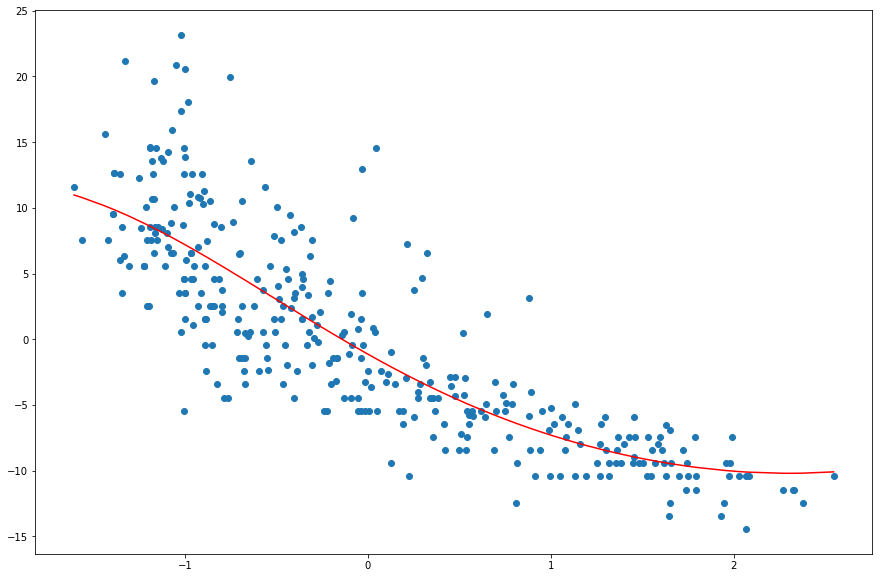

In [317]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train[:,3], y_train)
order = np.argsort(X_train[:,3])
xs = np.array(X_train[:,3])[order]
ys = np.array(train_means)[order]
plt.plot(xs, ys, color="red")
plt.show()

## PART 2

In [318]:
X_train_B = np.array(pd.read_csv("./boosting/X_train.csv", header=None))
X_test_B = np.array(pd.read_csv("./boosting/X_test.csv", header=None))
y_train_B = np.array(pd.read_csv("./boosting/y_train.csv", header=None))
y_test_B = np.array(pd.read_csv("./boosting/y_test.csv", header=None))

In [571]:
class LS_classifier:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.w = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(self.y)
        
    def predict(self, X, use_alpha=False):
        predictions = np.sign(np.dot(X,self.w))
        if use_alpha:
            return self.alpha*predictions
        return predictions
    
    def set_alpha(self, alpha):
        self.alpha = alpha
    
    def get_alpha(self):
        return self.alpha
        
    def flipw(self):
        self.w = (-1)*self.w
    
class Booster:
    def __init__(self, X, y, its, Xtest, ytest):
        self.X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.y = y.reshape(y.shape[0],)
        self.Xtest = np.hstack((Xtest, np.ones((Xtest.shape[0], 1))))
        self.ytest = ytest.reshape(ytest.shape[0],)
        self.Xb = self.X
        self.yb = self.y
        self.its = its
        self.weights = np.array([1/X.shape[0] for i in range(X.shape[0])])
        self.classifiers = []
        self.error_arr = []
        self.test_er = []
        self.train_er = []
        self.train_uppab = []
        self.boots = [0 for i in range(self.X.shape[0])]
    def boost(self):
        for t in range(self.its):
            if (t+1)%300==0:
                print("iteration: ",t+1)
#             if t<10:
#                 print(self.weights)
            self.bootstrap()
            tmp_classif = LS_classifier()
            tmp_classif.fit(self.Xb, self.yb)
            preds = tmp_classif.predict(self.X)
            #check 
            #print(preds.shape==self.y.shape)
            #error = np.dot(self.weights,np.array(preds!=self.y, dtype=int).T)
            
            #EPSILON
            error = np.sum(self.weights[(preds!=self.y)])
            if error>0.5:
                tmp_classif.flipw()
                preds = tmp_classif.predict(self.X)
                #error = np.dot(self.weights,np.array(preds!=self.y, dtype=int).T)
                error = np.sum(self.weights[(preds!=self.y)])
            self.error_arr.append(error)
            
            #print("error ",error)
            alpha = np.log((1-error)/error)*0.5
            #print("alpha ",alpha)
            tmp_classif.set_alpha(alpha)
            #self.weights *= np.exp(-alpha*np.dot(self.y, preds))
            self.weights = normalize(np.multiply(np.exp(-alpha*np.multiply(self.y,preds)), self.weights))
            #print("weights ", self.weights)
            #print(np.exp(-alpha*np.dot(self.y, preds)))
            #self.norm_w()
            self.classifiers.append(tmp_classif)
            
            
            # TRAIN ERROR
            train_preds = self.predict(self.X)
            train_error = errorcalc(self.y, train_preds, train_preds.shape[0])
            self.train_er.append(train_error)

            # TEST ERROR
            test_preds = self.predict(self.Xtest)
            test_error = errorcalc(self.ytest, test_preds, test_preds.shape[0])
            self.test_er.append(test_error)
            
            # TRAIN UPPERBOUND
            ZT = np.exp(-alpha)*(1-error) + np.exp(alpha)*error
            if len(self.train_uppab) == 0:
                self.train_uppab.append(ZT)
            else:
                self.train_uppab.append(ZT*self.train_uppab[-1])
            

    
    def predict(self, X):
        res = []
        for model in self.classifiers:
            res.append(model.predict(X, True))
        res = np.array(res)
        return np.sign(np.sum(res, axis=0))
    
    def bootstrap(self):
        indix = np.random.choice(np.arange(self.X.shape[0]), size=self.X.shape[0], replace=True, p=self.weights)
        #self.Xb = np.take(self.X, indices=indix, axis=0)
        #self.yb = np.take(self.y, indices=indix)
        for i in indix:
            self.boots[i] += 1
        self.Xb = self.X[indix]
        self.yb = self.y[indix]
        
    def get_error(self):
        return self.error_arr, self.train_er, self.test_er, self.train_uppab, self.boots
    
    def get_alphas(self):
        res = []
        for model in self.classifiers:
            res.append(model.get_alpha())
        return res
        
        
def errorcalc(x, y, l):
    return np.sum(np.array(x==y, dtype=int))/l

def normalize(vec):
    return vec/np.sum(vec)   

In [578]:
boosty = Booster(X_train_B, y_train_B, 1500, X_test_B, y_test_B.reshape((y_test_B.shape[0],)))
boosty.boost()

iteration:  300
iteration:  600
iteration:  900
iteration:  1200
iteration:  1500


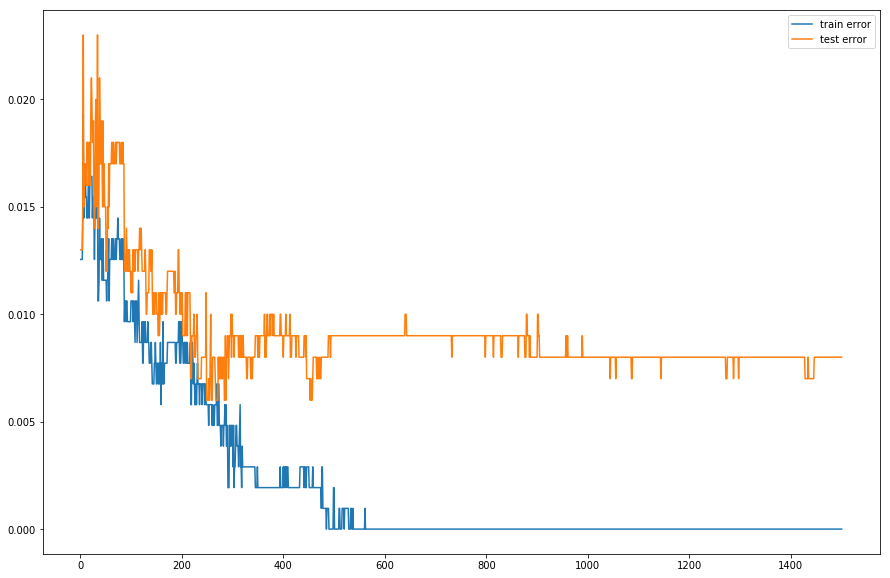

In [579]:
errors = boosty.get_error()

plt.figure(figsize=(15, 10))
plt.plot(range(1,1501), 1-np.array(errors[1]), label= "train error")
plt.plot(range(1,1501), 1-np.array(errors[2]), label= "test error")
plt.legend()
plt.show()

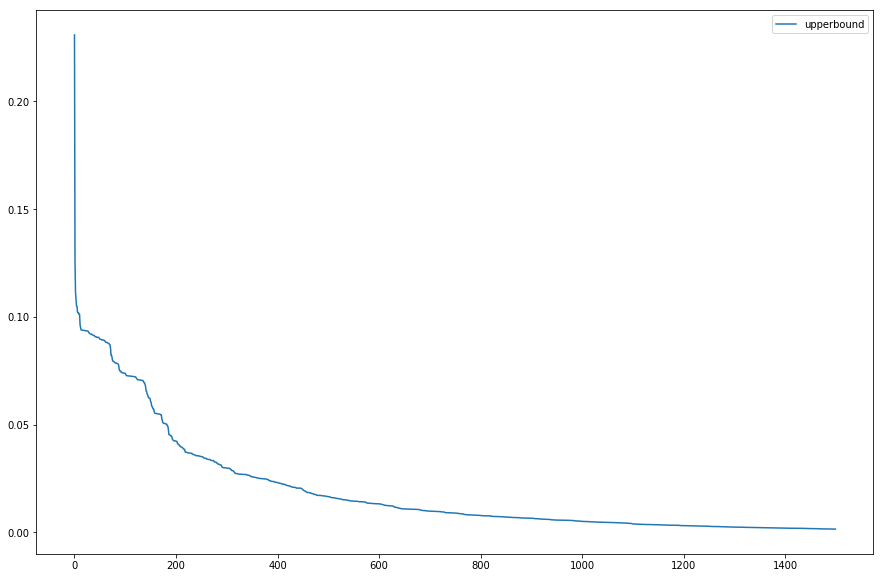

In [574]:
plt.figure(figsize=(15, 10))
plt.plot(range(0,1500), np.array(errors[3]), label= "upperbound")
plt.legend()
plt.show()

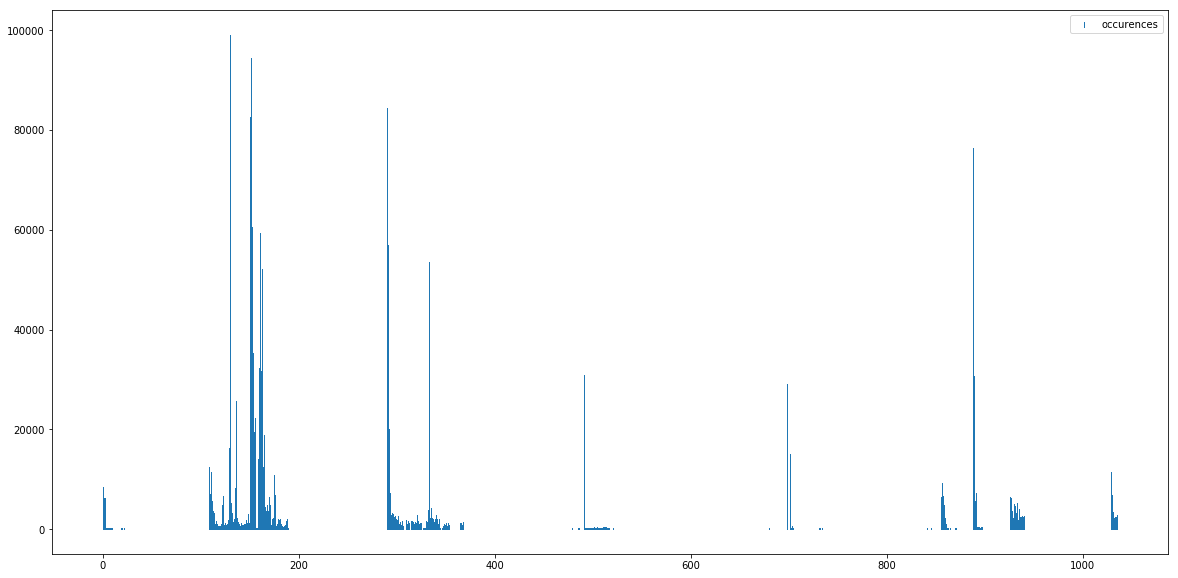

In [575]:
plt.figure(figsize=(20, 10))
markerline, stemlines, baseline =plt.stem(range(np.array(errors[4]).shape[0]), np.array(errors[4]), label= "occurences")
plt.setp(markerline, visible=False)
plt.setp(stemlines, linewidth=1)
plt.setp(baseline, visible=False)
plt.legend()
plt.show()

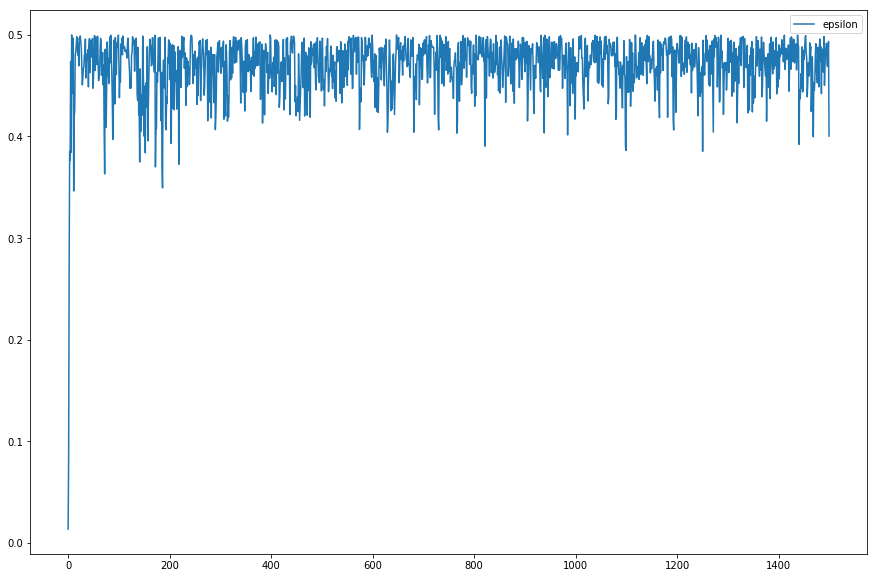

In [576]:
plt.figure(figsize=(15, 10))
plt.plot(range(0,1500), np.array(errors[0]), label= "epsilon")
plt.legend()
plt.show()

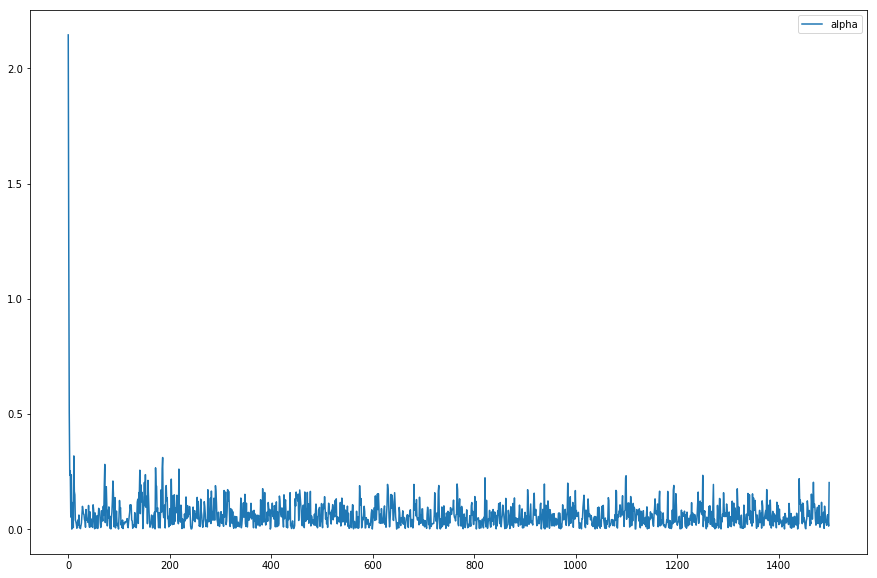

In [577]:
plt.figure(figsize=(15, 10))
plt.plot(range(0,1500), boosty.get_alphas(), label= "alpha")
plt.legend()
plt.show()